In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.python.keras.utils import np_utils
import tensorflow

In [7]:
# Data Preparation
x = pd.read_csv('./data/fashion-mnist.csv')
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape)

(10000, 784) (10000,)


In [9]:
X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [11]:
# for i in range(10):
#     plt.imshow(X_train[i],cmap="gray")
#     plt.show()

CNN Model


In [12]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation="relu"))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          51232     
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           6408      
                                                        

In [15]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Epoch 1/20
32/32 [==============================] - 17s 491ms/step - loss: 1.6860 - accuracy: 0.3800 - val_loss: 1.0817 - val_accuracy: 0.6090
Epoch 2/20
32/32 [==============================] - 17s 525ms/step - loss: 0.8186 - accuracy: 0.7045 - val_loss: 0.7272 - val_accuracy: 0.7465
Epoch 3/20
32/32 [==============================] - 17s 542ms/step - loss: 0.6538 - accuracy: 0.7550 - val_loss: 0.6308 - val_accuracy: 0.7740
Epoch 4/20
32/32 [==============================] - 17s 523ms/step - loss: 0.5886 - accuracy: 0.7825 - val_loss: 0.5885 - val_accuracy: 0.7885
Epoch 5/20
32/32 [==============================] - 17s 519ms/step - loss: 0.5329 - accuracy: 0.8016 - val_loss: 0.5390 - val_accuracy: 0.8100
Epoch 6/20
32/32 [==============================] - 32s 933ms/step - loss: 0.4857 - accuracy: 0.8238 - val_loss: 0.5059 - val_accuracy: 0.8235
Epoch 7/20
32/32 [==============================] - 18s 557ms/step - loss: 0.4652 - accuracy: 0.8288 - val_loss: 0.4918 - val_accuracy: 0.8250

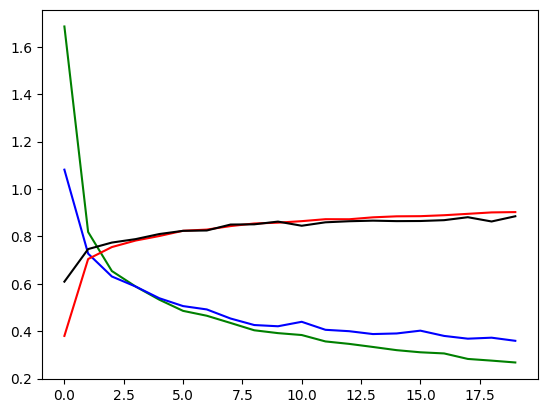

In [18]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()